In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shutil
import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

from glob import glob
trn='D:/D-Video/PennA/Penn_Action/*/'
tr= glob(trn)

len(tr)



15

In [2]:
i = 9
x = glob(tr[i]+'/*/')
vid = glob(x[i] +'/*')
vid[:2]

['D:/D-Video/PennA/Penn_Action\\pushup\\1357\\000001.jpg',
 'D:/D-Video/PennA/Penn_Action\\pushup\\1357\\000002.jpg']

In [3]:
from PIL import Image
import numpy as np

def load_and_preprocess_images(image_paths, target_size=(56, 56)):
    images = []
    
    for path in image_paths:
        # Load image
        img = Image.open(path)
        
        # Convert to RGB if not already
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Resize the image
        img = img.resize(target_size, Image.ANTIALIAS)
        
        # Convert to numpy array
        img_array = np.array(img)
        
        # Append the processed image to the list
        images.append(img_array)
    
    num_images = len(images)
    num_parts = 16
    part_length = num_images // num_parts
    remaining = num_images % num_parts
    
    image_parts = []
    start_idx = 0
    
    for i in range(num_parts):
        end_idx = start_idx + part_length + (1 if i < remaining else 0)
        image_part = images[start_idx:end_idx]
        image_parts.append(image_part)
        start_idx = end_idx
    
    return image_parts


image_parts = load_and_preprocess_images(vid)
print("Number of image parts:", len(image_parts))  # Should print 16 or less if there are fewer than 16 images
for i, part in enumerate(image_parts):
    print(f"Part {i+1} shape:", np.shape(part))


C:\Users\shaif\AppData\Local\Temp\ipykernel_576\2999657290.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


Number of image parts: 16
Part 1 shape: (3, 56, 56, 3)
Part 2 shape: (3, 56, 56, 3)
Part 3 shape: (3, 56, 56, 3)
Part 4 shape: (3, 56, 56, 3)
Part 5 shape: (3, 56, 56, 3)
Part 6 shape: (3, 56, 56, 3)
Part 7 shape: (2, 56, 56, 3)
Part 8 shape: (2, 56, 56, 3)
Part 9 shape: (2, 56, 56, 3)
Part 10 shape: (2, 56, 56, 3)
Part 11 shape: (2, 56, 56, 3)
Part 12 shape: (2, 56, 56, 3)
Part 13 shape: (2, 56, 56, 3)
Part 14 shape: (2, 56, 56, 3)
Part 15 shape: (2, 56, 56, 3)
Part 16 shape: (2, 56, 56, 3)


In [4]:
np.shape(image_parts)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (16,) + inhomogeneous part.

In [4]:
from PIL import Image
import numpy as np
import random

def discard_random_image(images):
    #print(np.shape(images[0]))
    return images[0]

q = discard_random_image(image_parts[1])

In [6]:
np.shape(q)

(56, 56, 3)

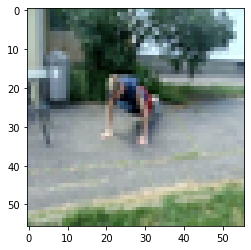

In [7]:
plt.imshow(q)

In [5]:
from PIL import Image
import numpy as np

def resize_images(q,target_size=(56, 56)):
    img = Image.fromarray(q)
    resized_img = img.resize((56,56), Image.ANTIALIAS)
    return resized_img



def prepare_videoes(image_paths, target_size=(56, 56)):
    images = []
    
    for path in image_paths:
        # Load image
        img = Image.open(path)
        
        # Convert to RGB if not already
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Resize the image
        img = img.resize(target_size, Image.ANTIALIAS)
        
        # Convert to numpy array
        img_array = np.array(img)
        
        # Append the processed image to the list
        images.append(img_array)
    
    num_images = len(images)
    num_parts = 16
    part_length = num_images // num_parts
    remaining = num_images % num_parts
    
    image_parts = []
    start_idx = 0
    
    for i in range(num_parts):
        end_idx = start_idx + part_length + (1 if i < remaining else 0)
        image_part = images[start_idx:end_idx]
        image_parts.append(image_part)
        start_idx = end_idx
    
    processed_parts = [discard_random_image(part) for part in image_parts]
    
    img_parts = [resize_images(part) for part in processed_parts]
    
    combined_image = np.zeros((224, 224, 3), dtype=np.uint8)
    
    for i, img_part in enumerate(img_parts):
        row = i // 4
        col = i % 4
        combined_image[row*56:(row+1)*56, col*56:(col+1)*56, :] = img_part
    
    return combined_image

combined_image = prepare_videoes(vid)
print("Combined image shape:", combined_image.shape)


C:\Users\shaif\AppData\Local\Temp\ipykernel_576\2251151208.py:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


Combined image shape: (224, 224, 3)


C:\Users\shaif\AppData\Local\Temp\ipykernel_576\2251151208.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize((56,56), Image.ANTIALIAS)


C:\Users\shaif\AppData\Local\Temp\ipykernel_576\300627332.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = q.resize((560,560), Image.ANTIALIAS)


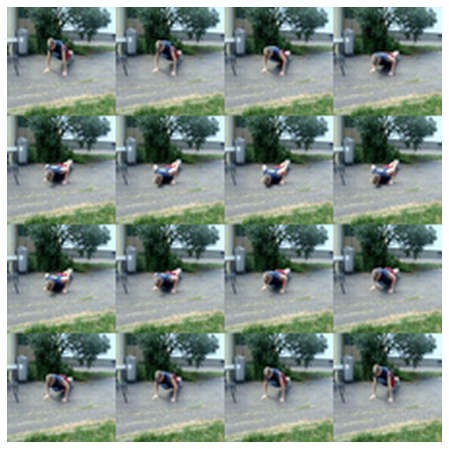

In [6]:
q =  Image.fromarray(combined_image)
resized_image = q.resize((560,560), Image.ANTIALIAS)
# Display the resized image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [7]:
from glob import glob
trn='D:/D-Video/PennA/Penn_Action/*/'
#trn='D:/data/hmdb/*/'
tr= glob(trn)
len(tr)

15

In [8]:
train = []
val = []
test = []
train_y = []
val_y = []
test_y = []

y = 0
for i in tr:
    
    #print(i)
    x = glob(i+'/*/')
    
    #shuffle(x)
    t,tt = train_test_split( x , test_size=0.1, random_state=42)
    t, vv = train_test_split( t , test_size=0.1, random_state=42)
    
    for j in t:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
        
        train.append(j)
        train_y.append(y)
    
    for j in vv:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
            
        val.append(j)
        val_y.append(y)
        
    for j in tt:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
            
        test.append(j)
        test_y.append(y)
        
    y = y+1

from tensorflow.keras.utils import to_categorical
tra_y =  np.array(to_categorical(train_y))
va_y  =  np.array(to_categorical(val_y))
te_y  =  np.array(to_categorical(test_y))

(train, tra_y) = shuffle(train, tra_y)
(val, va_y) = shuffle(val, va_y)
(test, te_y) = shuffle(test, te_y)

In [9]:

def get_te(k , a) :
    x = glob(k+'/*')
    #print("..........................")
    #print(x)
    #print("..........................")
    imgdata=prepare_videoes(x)
    idata = np.array(imgdata)
    X_train = idata.astype('float32') / 255.
    #print("..........................")
    #print(np.shape(X_train))
    #print("..........................")
    return X_train

def get_cat(k) :
    return np.array(k)

In [10]:
class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename , labels, batch_size) :
    self.filename = filename
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    y_train = get_cat(batch_y)
    i=0
    return np.array([get_te(i,self.filename)for i in batch_x]), np.array( y_train )


class My_Test_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename , batch_size) :
    self.filename = filename
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    i=0
    return np.array([get_te(i,self.filename)for i in batch_x])


In [11]:
batch_size = 16
my_training_batch_generator = My_Custom_Generator(train, tra_y, batch_size)
my_validation_batch_generator = My_Custom_Generator(val, va_y, batch_size)

In [18]:
#x = my_training_batch_generator.__getitem__(0)
#np.shape(x[0])

In [12]:
import numpy as np

# Initialize empty arrays to store training and validation data
X_train = []
Y_train = []
X_val = []
Y_val = []

batch_size = 16
num_train_samples = len(train)  # Number of training samples
num_val_samples = len(val)      # Number of validation samples

# Initialize your custom batch generators
my_training_batch_generator = My_Custom_Generator(train, tra_y, batch_size)
my_validation_batch_generator = My_Custom_Generator(val, va_y, batch_size)

# Load training data
for batch_idx in range(num_train_samples // batch_size):
    batch_images, batch_labels = my_training_batch_generator.__getitem__(batch_idx)
    X_train.append(batch_images)
    Y_train.append(batch_labels)

# Load any remaining training data (if num_train_samples is not a multiple of batch_size)
if num_train_samples % batch_size != 0:
    batch_images, batch_labels = my_training_batch_generator.__getitem__(num_train_samples // batch_size)
    X_train.append(batch_images[:num_train_samples % batch_size])
    Y_train.append(batch_labels[:num_train_samples % batch_size])

# Load validation data
for batch_idx in range(num_val_samples // batch_size):
    batch_images, batch_labels = my_validation_batch_generator.__getitem__(batch_idx)
    X_val.append(batch_images)
    Y_val.append(batch_labels)

# Load any remaining validation data (if num_val_samples is not a multiple of batch_size)
if num_val_samples % batch_size != 0:
    batch_images, batch_labels = my_validation_batch_generator.__getitem__(num_val_samples // batch_size)
    X_val.append(batch_images[:num_val_samples % batch_size])
    Y_val.append(batch_labels[:num_val_samples % batch_size])

# Concatenate the loaded batches into arrays
X_train = np.concatenate(X_train, axis=0)
Y_train = np.concatenate(Y_train, axis=0)
X_val = np.concatenate(X_val, axis=0)
Y_val = np.concatenate(Y_val, axis=0)

C:\Users\shaif\AppData\Local\Temp\ipykernel_576\2251151208.py:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)
C:\Users\shaif\AppData\Local\Temp\ipykernel_576\2251151208.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize((56,56), Image.ANTIALIAS)


In [14]:
np.shape(Y_train)

(1874, 15)

In [13]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam
base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit(x=X_train, y=Y_train, epochs=50, validation_data=(X_val, Y_val))

Epoch 1/50
59/59 [==============================] - 26s 201ms/step - loss: 3.0998 - accuracy: 0.1121 - val_loss: 6.9237 - val_accuracy: 0.0986
Epoch 2/50
59/59 [==============================] - 9s 152ms/step - loss: 2.3740 - accuracy: 0.2311 - val_loss: 2.9996 - val_accuracy: 0.2066
Epoch 3/50
59/59 [==============================] - 9s 145ms/step - loss: 2.3451 - accuracy: 0.3090 - val_loss: 9214.6592 - val_accuracy: 0.0751
Epoch 4/50
59/59 [==============================] - 9s 160ms/step - loss: 1.9980 - accuracy: 0.3426 - val_loss: 2.2414 - val_accuracy: 0.2441
Epoch 5/50
59/59 [==============================] - 9s 154ms/step - loss: 1.7039 - accuracy: 0.4456 - val_loss: 4.1340 - val_accuracy: 0.1174
Epoch 6/50
59/59 [==============================] - 9s 161ms/step - loss: 1.4156 - accuracy: 0.5261 - val_loss: 5.2055 - val_accuracy: 0.2535
Epoch 7/50
59/59 [==============================] - 9s 154ms/step - loss: 1.2560 - accuracy: 0.5854 - val_loss: 1292.0103 - val_accuracy: 0.2207

In [14]:
from sklearn.metrics import accuracy_score

# Assuming y_val and predf are your ground truth and predicted values, respectively
accuracy = accuracy_score( np.argmax(Y_val,axis = 1) , np.argmax ( model.predict(X_val) ,axis = 1 ) )

print("Accuracy:", accuracy)


Accuracy: 0.4272300469483568


In [16]:
import torch
num_classes =15
y_train = np.argmax(Y_train,axis = 1)
y_val = np.argmax(Y_val,axis=1)

x_train = X_train.reshape(len(X_train), 3, 224, 224)
x_val = X_val.reshape(len(X_val), 3, 224, 224)

In [17]:
import torch
from transformers import ViTForImageClassification, TrainingArguments, Trainer
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            'pixel_values': torch.tensor(self.x[idx]),
            'labels': torch.tensor(self.y[idx], dtype=torch.long)  # Ensure labels have the correct data type
        }

# Assuming you have x_train and y_train defined somewhere
custom_dataset = CustomDataset(x_train, y_train)

# Define your model
model_name_or_path = "google/vit-large-patch32-224-in21k"
labels = list(range(num_classes))

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
)

# Update your training arguments and remove load_best_model_at_end
training_args = TrainingArguments(
    output_dir="./vit-base-beans",
    per_device_train_batch_size=16,
    evaluation_strategy="no",  # Keep evaluation strategy as "epoch"
    num_train_epochs=100,
    fp16=True,
    save_steps=20,
    logging_steps=10,
    learning_rate=2e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to='tensorboard',
    # Remove load_best_model_at_end
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=None,  # You don't need data_collator when using a custom DataLoader
    train_dataset=custom_dataset,  # Pass the custom training dataset directly
)

train_results = trainer.train()

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-large-patch32-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: FP16 Mixed precision training with AMP or APEX (`--fp16`) and FP16 half precision evaluation (`--fp16_full_eval`) can only be used on CUDA or NPU devices.

In [ ]:
import torch

# Assuming x_val is a tensor with shape (batch_size, channels, height, width)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_val_tensor = x_val_tensor.to(device)
model.eval()

with torch.no_grad():
    output = model(x_val_tensor)  # This assumes your model outputs logits

logits = output.logits
pred = logits.argmax(dim=1).cpu().numpy()
pred[:5]

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_val and predf are your ground truth and predicted values, respectively
accuracy = accuracy_score(y_val, pred)

print("Accuracy:", accuracy)


In [24]:
from tensorflow.keras.models import load_model, Model

# Load the saved SimCLR contrastive model
saved_contrastive_model_path = r"C:\Users\shaif\Downloads\contrastive_model_effb0_48.h5"
contrastive_model = load_model(saved_contrastive_model_path, compile=False)

# Extract the ResNet50 layer
resnet50_layer = contrastive_model.get_layer("efficientnetb0")

# Create a new input layer
new_input = tf.keras.Input(shape=(224, 224, 3))

# Use the ResNet50 layer directly on the new input
resnet_output = resnet50_layer(new_input)

# Build a new encoder model
encoder = Model(inputs=new_input, outputs=resnet_output)

print("Standalone encoder model created successfully.")
encoder.summary()


Standalone encoder model created successfully.
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
_________________________________________________________________


In [26]:
from tensorflow.keras.models import load_model, Model

# Load the saved SimCLR contrastive model
saved_contrastive_model_path = r"C:\Users\shaif\Downloads\contrastive_model.h5"
contrastive_model = load_model(saved_contrastive_model_path, compile=False)

# Extract the ResNet50 layer
resnet50_layer = contrastive_model.get_layer("resnet50")

# Create a new input layer
new_input = tf.keras.Input(shape=(224, 224, 3))

# Use the ResNet50 layer directly on the new input
resnet_output = resnet50_layer(new_input)

# Build a new encoder model
encoder = Model(inputs=new_input, outputs=resnet_output)

print("Standalone encoder model created successfully.")
encoder.summary()


Standalone encoder model created successfully.
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
_________________________________________________________________


In [25]:
# Use the extracted encoder instead of ResNet50V2
base_model = encoder  # Use the encoder extracted from the SimCLR model

# Build the classification model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)  # Replace 51 with the number of your classes

# Create the new classification model
classification_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
classification_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
classification_model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dense_5 (Dense)             (None, 15)                3855      
                                                                 
Total params: 4,381,362
Trainable params: 4,339,339
Non-trainable params: 42,023
_________________________________________________________________


In [26]:
classification_model.fit(x=X_train, y=Y_train, epochs=50, validation_data=(X_val, Y_val))

Epoch 1/50
59/59 [==============================] - 18s 212ms/step - loss: 1.8066 - accuracy: 0.4280 - val_loss: 796.8154 - val_accuracy: 0.0516
Epoch 2/50
59/59 [==============================] - 11s 185ms/step - loss: 1.0005 - accuracy: 0.6676 - val_loss: 5.6236 - val_accuracy: 0.0751
Epoch 3/50
59/59 [==============================] - 11s 189ms/step - loss: 0.5985 - accuracy: 0.8196 - val_loss: 3.1874 - val_accuracy: 0.0657
Epoch 4/50
59/59 [==============================] - 11s 189ms/step - loss: 0.3792 - accuracy: 0.8762 - val_loss: 3.6052 - val_accuracy: 0.0516
Epoch 5/50
59/59 [==============================] - 12s 207ms/step - loss: 0.3268 - accuracy: 0.8938 - val_loss: 4.3116 - val_accuracy: 0.0845
Epoch 6/50
59/59 [==============================] - 16s 277ms/step - loss: 0.2122 - accuracy: 0.9301 - val_loss: 4.3400 - val_accuracy: 0.0751
Epoch 7/50
59/59 [==============================] - 18s 303ms/step - loss: 0.1844 - accuracy: 0.9418 - val_loss: 3.5530 - val_accuracy: 0.06

In [21]:
from sklearn.metrics import accuracy_score

# Assuming y_val and predf are your ground truth and predicted values, respectively
accuracy = accuracy_score( np.argmax(Y_val,axis = 1) , np.argmax ( classification_model.predict(X_val) ,axis = 1 ) )

print("Accuracy:", accuracy)


Accuracy: 0.11267605633802817
